In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("PLGDPQ.csv", index_col = 'observation_date', parse_dates=True)

In [14]:
df.head()

,NGDPRNSAXDCPLQ
observation_date,
2003-01-01,244364.393792
2003-04-01,259314.197167
2003-07-01,263203.649299
2003-10-01,293402.554525
2004-01-01,261965.546518


In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
df['DES_add_12'] = ExponentialSmoothing(df['NGDPRNSAXDCPLQ'], trend='add').fit().fittedvalues.shift(-1)

c:\REPO\studia\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='observation_date'>

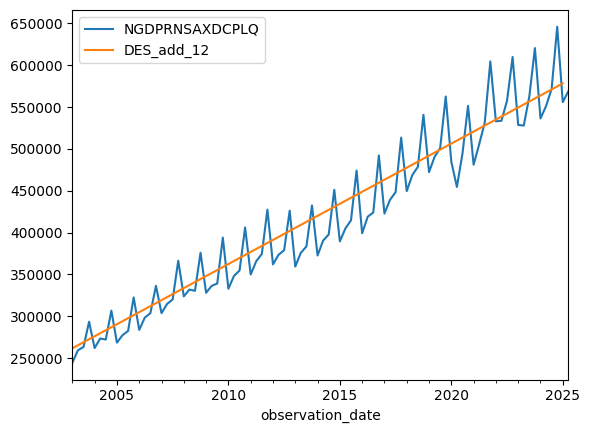

In [20]:
df.plot()

In [21]:
# ------------------------------------------------------------------------------------
# 2. Addytywna metoda Holta–Wintersa i prognozy ex-ante
# ------------------------------------------------------------------------------------
H = 12  # 3-letni horyzont przy freq=4 (12 kwartałów)

# a) Wersja podstawowa (trend i sezonowość addytywne)
hw_add = ExponentialSmoothing(
    Xts.astype(float),
    trend="add",
    seasonal="add",
    seasonal_periods=4,
    initialization_method="estimated"
).fit(optimized=True)

# (opcjonalnie) ręczne parametry wygładzania:
# hw_add = ExponentialSmoothing(Xts, trend="add", seasonal="add", seasonal_periods=4,
#                               initialization_method="estimated").fit(smoothing_level=0.3,
#                                smoothing_slope=0.2, smoothing_seasonal=0.25, optimized=False)

print("Parametry wygładzania (alpha, beta, gamma):",
      hw_add.params.get("smoothing_level"),
      hw_add.params.get("smoothing_trend"),
      hw_add.params.get("smoothing_seasonal"))

# "Prognozy przedziałowe" – uproszczenie: stała wariancja reszt (nie rośnie z h)
# (w statsmodels dla klasycznego Holt-Winters brak natywnych przedziałów)
fc_add = hw_add.forecast(H)
resid_std = np.std(hw_add.resid, ddof=1)
ci_low = fc_add - 1.96 * resid_std
ci_high = fc_add + 1.96 * resid_std
hw_addprogn = pd.DataFrame({"mean": fc_add, "lo95": ci_low, "hi95": ci_high})

# Podgląd prognoz ex-ante
print(hw_addprogn)

# Wizualizacja
ax = Xts.to_timestamp().plot(lw=2, color="black", label="X(t)",
                             title="Addytywny model Holta–Wintersa i prognozy PKB w Polsce")
fc_add.to_timestamp().plot(ax=ax, lw=2, label="Prognoza (punktowa)")
# use datetime x and numeric y arrays to avoid matplotlib conversion issues
x_add = hw_addprogn.index.to_timestamp().to_pydatetime()
plt.fill_between(x_add, ci_low.values, ci_high.values, alpha=0.2, label="95% CI")
ax.set_xlabel("t")
ax.set_ylabel("X(t)")
plt.legend(loc="best")
plt.show()

# ------------------------------------------------------------------------------------
# 2'. Multiplikatywny Holt–Winters (opcjonalnie)
# ------------------------------------------------------------------------------------
# hw_mult = ExponentialSmoothing(
#     Xts.astype(float),
# #     trend="add",
#     seasonal="mul",
#     seasonal_periods=4,
#     initialization_method="estimated"
# ).fit(optimized=True)
# fc_mult = hw_mult.forecast(H)

NameError: name 'Xts' is not defined